<a href="https://colab.research.google.com/github/yongsa-nut/TU_CN240_DataScience_671/blob/main/HW4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# HW4 - Data Cleaning and Regex
## DUE: 27th September 2024 - 23:59

- There are 20 questions in this homework. 5 poitns total.

## Regex Practices

- Run the code below so you can check your answers.

In [ ]:
import re

# function to check your regex
def test_regex(pattern, test_cases, expected_results, match_type='full'):
    print(f"Testing pattern: {pattern}")

    for i, (test, expected) in enumerate(zip(test_cases, expected_results), 1):
        if match_type == 'full':
            result = bool(re.fullmatch(pattern, test))
            match_text = 'matches' if result else 'does not match'
        elif match_type == 'search':
            result = bool(re.search(pattern, test))
            match_text = 'contains match' if result else 'does not contain match'

        print(f"Test {i}: {'✓' if result == expected else '✗'} - '{test}' {match_text}")

        if match_type == 'search' and result:
            matches = re.findall(pattern, test)
            print(f"   Matches found: {matches}")

    print()

## Q1a - Uppercase and lowercase only

Write a regular expression to match a string that contains only uppercase and lowercase letters (no numbers or special characters).

- Match: HelloWorld, abcDEF, RegexPractice
- Not match: Hello123, Special@Characters, With Spaces

In [ ]:
pattern_1a = r"..."  # Fill in your regex here

## Test cases
test_cases_1a = ["HelloWorld", "abcDEF", "RegexPractice", "Hello123", "Special@Characters", "With Spaces"]
expected_1a = [True, True, True, False, False, False]
test_regex(pattern_1a, test_cases_1a, expected_1a)

### Q1b - Zip codes
Create a regex pattern to match a zip code in the format xxxxx or xxxxx-xxxx, where x represents a digit.

- Match: 12345, 12345-6789
- Not match: 1234, 123, 123456, 12345-678

In [ ]:
pattern_1b = r"..."  # Fill in your regex here

## Test cases
test_cases_1b = ["12345", "12345-6789", "1234", "123", "123456", "12345-678"]
expected_1b = [True, True, False, False, False, False]
test_regex(pattern_1b, test_cases_1b, expected_1b)

### Q1c - Time

Develop a regex pattern to match a time in 24-hour format (HH:MM), where HH is between 00 and 23, and MM is between 00 and 59.

- Match: 13:45, 00:00, 23:59
- Not match: 24:00, 12:60, 1:30

In [ ]:
pattern_1c = r"..."  # Fill in your regex here

## Test cases
test_cases_1c = ["13:45", "00:00", "23:59", "24:00", "12:60", "1:30"]
expected_1c = [True, True, True, False, False, False]
test_regex(pattern_1c, test_cases_1c, expected_1c)

### Q1d - username

Write a regular expression to match a string that contains only lowercase letters and underscores, starts with a letter, and is between 3 and 16 characters long.

- Match: hello_world, a_b_c
- Not match: username_123, _hello, ab, abcdefghijklmnopq

In [ ]:
pattern_1d = r"..."  # Fill in your regex here

## Test cases
test_cases_1d = ["hello_world", "a_b_c" "username_123", "_hello", "ab", "abcdefghijklmnopq"]
expected_1d = [True, True, False, False, False, False]
test_regex(pattern_1d, test_cases_1d, expected_1d)

### Q1e - Apple or Orange

Create a regex pattern to find the word "apple" or "orange" in a sentence.

- Match: "I prefer apple juice over orange juice." (Match: apple, orange), "The orange cat played with an apple." (Match: orange, apple)

- Not Match: "Pineapple is my favorite fruit.", "He wore an oran shirt."

In [ ]:
pattern_1e = r"..."  # Fill in your regex here

## Test cases
test_cases_1e = [
            "I prefer apple juice over orange juice.",
            "The orange cat played with an apple.",
            "Pineapple is my favorite fruit.",
            "He wore an oran shirt."
               ]
expected_1e = [True, True, False, False]
test_regex(pattern_1e, test_cases_1e, expected_1e,'search')

## Bloomberg News Analysis

- For the rest of this homework, we will analyse Bloomberg articles published during 2010
- The data that we will use for this section is `msft_bloomberg_news.txt`.
- The data is in json format so we will have to use `.read_json()`

In [ ]:
import pandas as pd
from plotnine import *

# Ensure that pandas shows at least 280 characters in columns, so we can see full articles.
pd.set_option("max_colwidth", 280)

msft_news_df = pd.read_json('/content/msft_bloomberg_news.txt').set_index('id')
msft_news_df.head(3)

In [ ]:
msft_news_df.shape

**CAUTION: Viewing the contents of large files in a Jupyter Notebook could crash your browser. Be careful not to print the entire contents of the file.**


<br>

---

## Question 2: Time Analysis

After loading in the data, we can start exploring news articles by analyzing the relationships between the release dates (date of publication) and different topics and companies.

---

### Question 2a-b

First, let's extract the date and time from the `released_at` column in `msft_news_df`. Notice that the date and time are encoded in the following format:

```
<date>May 29 2012</date> <time>09:40:58</time>
<date>May 18 2011</date> <time>22:42:40</time>
<date>August 15 2012</date> <time>00:09:02</time>
...
```

There are several ways to convert this to easy to use formats. However, for this assignment, we are going to use string manipulation functions.

- Create a regular expression that extracts the Month, Day, Year, Hour, Minute, and Second from the `msft_news_df["released_at"]` column. You should create a new `DataFrame` called `dates` that contains:
  1. The same index as `msft_news_df` (`id`) and
  2. Column labels: `"Month"`, `"Day"`, `"Year"`, `"Hour"`, `"Minute"`, `"Second"`.

- Additionally, **convert all numerical values** (`"Year"`, `"Day"`, `"Hour"`, `"Minute"`, `"Second"`) to type `int`.
  - We haven't learned how to do this compactly so you will have to do it one by one.
  - To convert, you can use '.astype()` see [documentation](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.astype.html)

**Hint 1:** You should use the [`Series.str.extract`](https://pandas.pydata.org/docs/reference/api/pandas.Series.str.extract.html) function.

**Hint 2:** Don't forget to use raw strings and capture groups. Copy the above example text into [regex101.com](https://regex101.com/) to experiment with your regular expressions.

**Hint 3:** It might be helpful to break this up into a couple of steps (e.g., first extract date values such as Month, Day, and Year and then extract time values such as Hour, Minute, and Second).

In [ ]:
...

dates

<br>

---

### Question 2c

Now that we've figured out how to extract dates, create a new `DataFrame` called `msft_news_2010` that only contains articles released in 2010. This `DataFrame` should contain:
1. An index of `id` and
2. Columns: `"title"`, `"released_at"`, `"content"`, `"path"`, `"Month"`, `"Day"`, and `"Year"`.

**Hint:** Consider [merging](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.merge.html) `msft_news_df` with `dates`.

In [ ]:
msft_news_df = ...  # merging
msft_news_2010 = ... # grab only 2010
msft_news_2010.head(1)

<br>

---

### Question 2d-e

After processing the article release dates, we can analyze articles about different topics and companies. Note that all the articles in the provided dataset mention Microsoft/MSFT, but they can also mention other companies.


For each company in the list of `companies` (provided below), add a boolean column to the `msft_news_df` `DataFrame` indicating whether the corresponding company is mentioned in the text of the article. Ultimately, you should add six new columns (`"amazon"`, `"nintendo"`, `"apple"`, `"sony"`, `"facebook"`, `"netflix"` ) containing `True`/`False` values to the `DataFrame`. You may use a for loop over the list of companies.

The table should look similar to the row pictured below:

<img src = "https://drive.google.com/thumbnail?id=1_66nvLPNyOkupLuLuAfy8n3QJ6kI5ntl&sz=w1000" width = "1000">

**Note:** Make the contents of the articles **lowercase** before searching for the keywords.

In [ ]:
companies = ["amazon", "nintendo", "apple", "sony", "facebook", "netflix"]

...

msft_news_df.head(1)

### Question 3a

Now, we can put everything together to analyze the release dates and volume of articles for different companies.

- Ceate a new `DataFrame` called `year_news` that contains the **number of articles** mentioning each company in the list `companies` **after 2010 (inclusive)**.
- `year_news` should have six columns (one column for each company), and the index of this `DataFrame` should be the release year `"Year"`.

The data should look like below:

<img src = "https://drive.google.com/thumbnail?id=1VsFWxv54YRKf5Jd4f33kAmkovgCAznIy&sz=w1000" width = "500">

In [ ]:
year_news = ...
year_news.head()

### Question 3b
- `year_news` is still not in the format that we can plot. In other word, the data is not tidy.
- Think about when you need to plot this graph, you want to set x to `year`, y = `count`, and group/color = `company`
- What we want is the data with the following columns: `company`, `year`, and `count`.
- `melt` this data to be the right format.

In [ ]:
year_news = year_news.reset_index()
year_news = ...

year_news

### Question 3c

- Now we can use `year_news` to plot the number of articles of the six companies from 2010 to 2013.
- Create a plot as show below. Don't forget y label and title.
- If your lines don't match the plot below. Check 3a-3b.

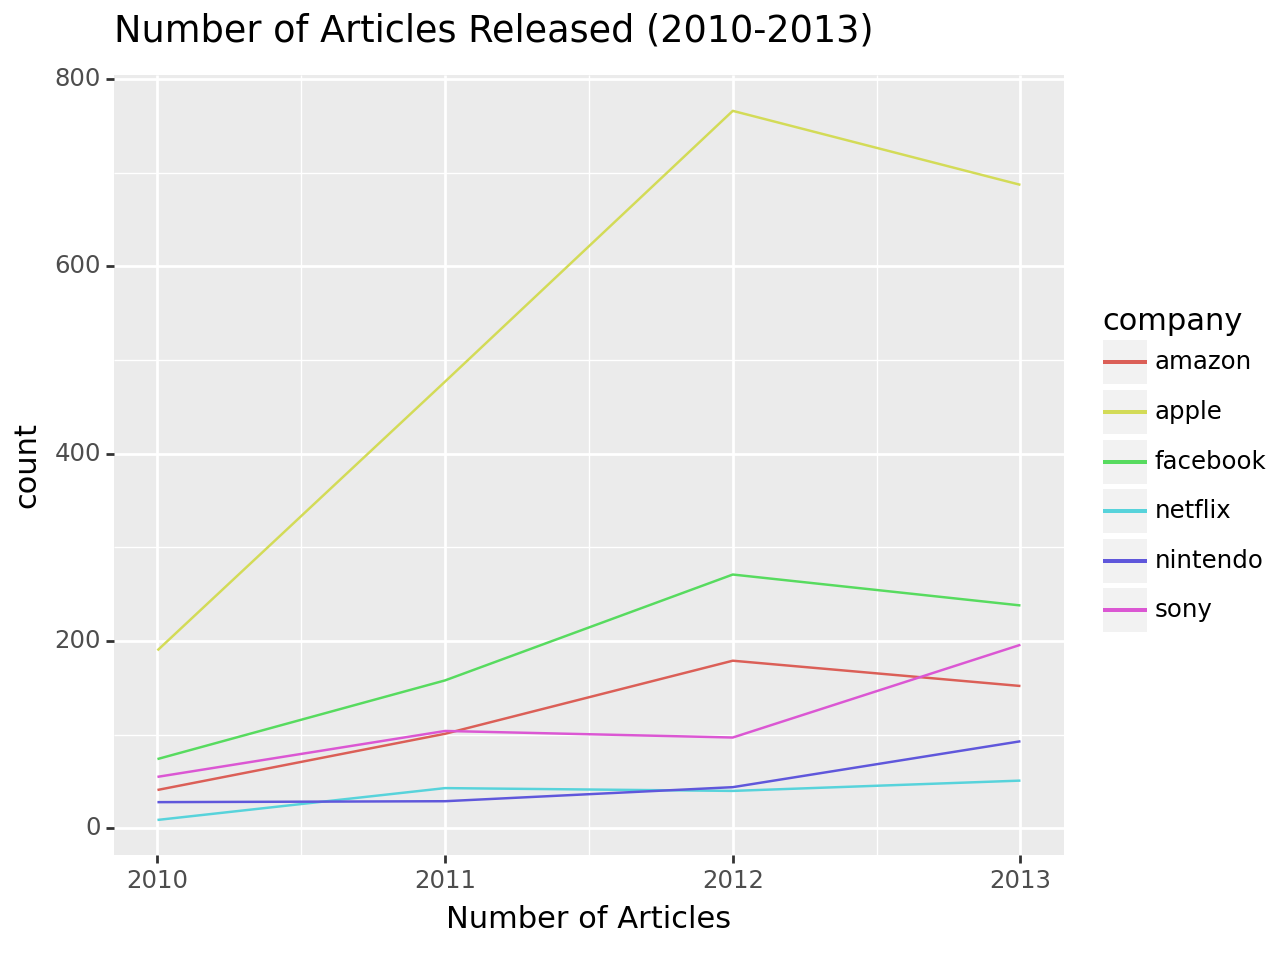

In [ ]:
# See the graph below

In [ ]:
g_year_news = ...
print(g_year_news)

<br>

---

## Sentiment Analysis

In this section, we will analyse the sentiment of each article - classifying whether the tone of the article is positive or negative.

This part is divided into two sub-parts:
1. Using AFINN library to analyse the first sentence of the article only.
2. Compare to existing sentiment analysis that was done using a more recent technique based on transformer, called [DistrilBert](https://github.com/huggingface/transformers/tree/main/examples/research_projects/distillation).

The reason for this is that the recent model is quite big and we cannot easily run it. On the other hand, AFINN is much smaller and fast.
Due to the size of the dataset, we will focus only the articles in 2010, `msft_news_2010`.

### Question 4a: MSFT only

- We will focus on articles about Microsoft only.
- For this question, assign `microsoft_re` to a regular expression that **matches all sentences referencing "microsoft" or "msft" (in lowercase)**. You should assume all sentences end with `.`, `?`, or `!` and that these punctuation characters are not used for any other purpose.
- This is of course not true in practice (e.g., this example! and 3.14), but we will often make these simplifying assumptions to enable progress in data analysis. You will see this in your results.
- You should develop and test your regular expression using [regex101.com](https://regex101.com/). Here are some practice sentences.

```
have you ever worked at microsoft? i once did. microsoft is known for
their research in ai. it is abbreviated as msft.
```

**Hint 1:** Consider using the negation character class `r"[^.!?]"` to indicate any characters except these three.

**Hint 2:** `( )` will specifies a capture group. You have two options: 1) don't use it, 2) add `:?` so `(:?xxxx|xxx)`. Both ways are accepted.

**Hint 3:** Your regex should consist of `[Anything before](:?xxxxx|xxx)[Anything after][Ending symbols]`


In [ ]:
microsoft_re = ...


### Question 4b: Sentiment of the first sentece

- The article can be quite long and running all of them through the model will take time. Instead, we will only analyze the **first sentence** that mentions `microsoft` or `msft` from each article in `msft_news_2010`.

Specifically, you should:

1. Canonicalize the content of the articles (`content` column) by converting the text to **lowercase**,
2. Use the `microsoft_re` regular expression to extract the first sentence mentioning "microsoft" or "msft" in each article **without**, and
3. Create a new column `first_sentence` in `msft_news_2010` with these values.


**Hint 1:** The `Series.str.findall` function might be useful (might take around a minute to run).

**Hint 2:** We only want the first sentence from each article that matches `microsoft_re`. Take a look at the [documentation for `Series.str.findall`](https://pandas.pydata.org/docs/reference/api/pandas.Series.str.findall.html) to see how this function handles multiple matches to `microsoft_re`.

**Hint 3:** To get the first match you can do `.str[0]`

In [ ]:
...
msft_news_2010.head()

### Question 4c: Sentiment Analysis with AFINN Library

- We will be using the [AFINN Library](https://github.com/fnielsen/afinn) to do sentiment analysis.
- This library provides a word-based sentiment analysis that calculate the sentiment score based on a labeled word list, where each word has been scored for valence - a scale between negative (-5) and positive (5).
- `.score()` return the total score by summing the scores of every word together.
- You can test the code below.

In [ ]:
!pip install afinn

In [ ]:
from afinn import Afinn

afn = Afinn()

In [ ]:
sentence = "Happy Happy Happy Happy Sad Sad" # Try removing or adding words here
print(f"Raw score = {afn.score(sentence)}")
print(f"Avg normalized score = {afn.score(sentence)/len(sentence.split()/5):.2f}")

- Using this model, let's now get the **numerical** sentiment score of the first sentence that mentions "microsoft" or "msft" for each article.
- We will add a new column `sentence_total_sentiment` to `msft_news_2010` by calling `afn.score` on `first_sentence` using `apply` (We will cover this in the next lecture.)

In [ ]:
msft_news_2010.loc[:,'sentence_total_sentiment'] = msft_news_2010['first_sentence'].apply(afn.score)
msft_news_2010.head(5)

- Now using `sentence_total_sentiment`, create another column `sentence_avg_normalized_sentiment` by dividing the score by the number of words and then 5 (See the code above.)

In [ ]:
...

msft_news_2010.head(5)


---

### Sentiment from Full Sentences

We can now turn to an alternative, more accurate way of determining the sentiment score of articles--getting the sentiment based on the entire text, rather than getting sentiment based on the first sentence including "microsoft" or "msft" in the text. Let's load in `data/article_sentiment_logs.csv`, which contains sentiment scores of the full articles as a `DataFrame` `full_sentiments`. In this file, you are provided with logs which include the `id`, `score`, and `label` ("N" for "NEGATIVE" and "P" for "POSITIVE") in the following format:

```
<device:1> <id:77243971> <result: [0.9963290095329285 (N)]>
<device:0> <id:14799046> <result: [0.9980687499046326 (N)]>
<device:1> <id:43064156> <result: [0.997868537902832 (N)]>
<device:1> <id:29402508> <result: [0.9924335479736328 (N)]>
...
```

- Note: `result: [score (label)]`

Run the following cell to load in the `DataFrame` and see what it contains:

In [ ]:
# Run this cell; no further action is needed
log_sentiments = pd.read_csv('/content/article_sentiment_logs.csv')
log_sentiments.head()

,RunNum,log
0,0,<device:0> <id:77243971> <result: [0.9963290095329285 (N)]>
1,1,<device:0> <id:14799046> <result: [0.9980687499046326 (N)]>
2,2,<device:0> <id:43064156> <result: [0.997868537902832 (N)]>
3,3,<device:0> <id:29402508> <result: [0.9924335479736328 (N)]>
4,4,<device:0> <id:71427879> <result: [0.9897157549858093 (N)]>


### Question 5a: Cleaning up Data

- Create a new DataFrame `full_sentiments` that contains the `id` and `content_sentiment` (a number ranging from -1 to 1).

- `content_sentiment` is based on `score`. If the label is 'N', then the score
is multiplied by -1.

**Hint 1:** Use `\` to escape special characters (e.g., `[, (`)

**Hint 2:** Don't forget to convert string to number.

**Hint 3:** This question is quite involved. Try to do it step by step.


This is what `full_sentiments` should look like:

<img src = "https://drive.google.com/thumbnail?id=1sZbnHLnaREzinlEXfRGf3737-PHVYGDN&sz=w1000" width = "300">

In [ ]:
...

full_sentiments.head()

### Question 5b - Merging
- Merge `full_sentiments` with `msft_news_2010` and set it to `msft_scores_2010` so we can see both scores side by side.

**Note:** If you run into issues when merging, you may need to reset `full_sentiments` by running the above cell again.

**Hint 1**: `msft_news_2010` should have `id` as index.

**Hint 2**: Check out [merge](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.merge.html) documentation.

In [ ]:
msft_scores_2010 = ...
msft_scores_2010.head()

### Question 5c - The difference
- Calculate the difference between `content_sentiment` and `sentence_avg_normalized_sentiment`. Create a new column `sentiment_difference` in our `DataFrame` `msft_scores_2010` with `content_sentiment - sentence_avg_normalized_sentiment`.


In [ ]:
...
msft_scores_2010.head(3)

### Question 5d - Plotting

- Finally, create a density plot for `sentiment_difference`.

In [ ]:
...

# Submission
- File > Download > Download .ipynb
- Upload to MS Teams